In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

#import sys
#from os.path import isfile, join
#sys.path.insert(0, join(os.getcwd(),os.pardir))

In [2]:
FOLDER_PATH = "F:\\user\\Google Drive\\Catherning Folder\\THU\\Thesis\\Work\\Recipe datasets"
DATASET = ["scirep-cuisines-detail","Yummly28"]
FILES = ["cleaned_data.pkl","full_data.pkl"]

In [3]:
# FROM NN_classification
def createDFrame(file):
    
    dataset = DATASET[1]
    df = pd.read_pickle(os.path.join(
        FOLDER_PATH, dataset, file))
    df = df.set_index("id")
    len1 = len(df)

    dataset = DATASET[0]
    df2 = pd.read_pickle(os.path.join(
        FOLDER_PATH, dataset, file))
    df2["id"] = [len(df)+i for i in range(len(df2))]
    df2 = df2.set_index("id")
    df = pd.concat([df, df2],sort=False)
    if len(df)!=len1+len(df2):
        print("Error! Missing data")

    return df

df_train = createDFrame(FILES[1])

# Data analysis

NorthAmerican       54022
SouthernEuropean     8963
LatinAmerican        6347
WesternEuropean      4243
Asian                3144
EastAsian            2788
SouthAsian           2078
SoutheastAsian        805
MiddleEastern         645
EasternEuropean       381
African               363
NorthernEuropean      250
Name: cuisine, dtype: int64

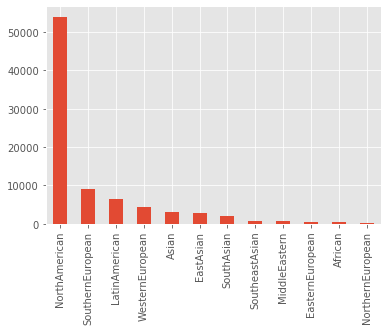

In [4]:
%matplotlib inline

plt.style.use('ggplot')
df_train['cuisine'].value_counts().plot(kind='bar')

df_train['cuisine'].value_counts()

In [5]:
df_train["nb_ingrs"]=[len(x) for x in df_train["ingredients"]]
df_train["index"] =[i for i in range(len(df_train))]

In [6]:
df_train[["cuisine","nb_ingrs"]].groupby(["cuisine"]).mean().sort_values(by="nb_ingrs")

,nb_ingrs
cuisine,
NorthernEuropean,6.824000
MiddleEastern,8.387597
EasternEuropean,8.388451
NorthAmerican,8.470419
EastAsian,9.415710
WesternEuropean,9.421164
African,10.523416
SouthernEuropean,10.851612
LatinAmerican,11.764771


In [7]:
LIM_INGR = 35
# plot data
nbingr_cuis = df_train[df_train["nb_ingrs"]<LIM_INGR][["cuisine","nb_ingrs","index"]].groupby(["nb_ingrs","cuisine"]).count().unstack()
# DO relative, par rapport nb total dans chaque cuisine

In [15]:
nbingr_cuis.columns=nbingr_cuis.columns.droplevel()

In [16]:
cuisine_count = df_train['cuisine'].value_counts()

In [17]:
for cuis,val in cuisine_count.iteritems():
    nbingr_cuis[cuis]=nbingr_cuis[cuis]/val

In [18]:
cuisine_list = df_train.cuisine.unique()

Text(0, 0.5, 'Proportion of recipes by cuisine')

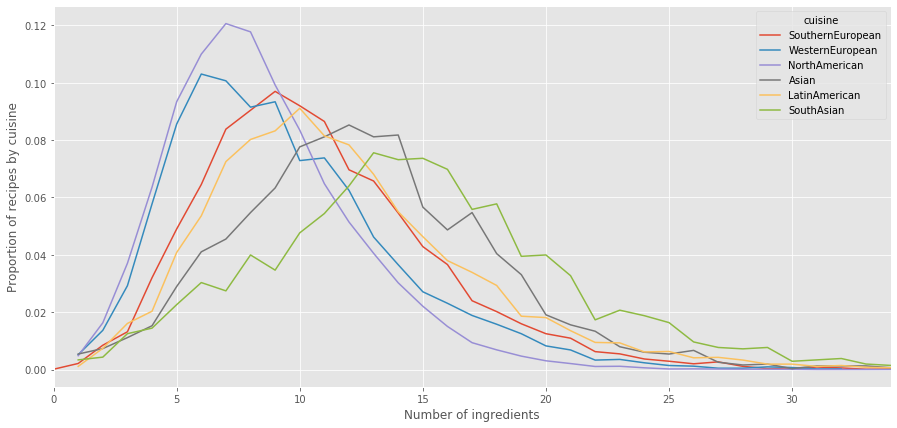

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
nbingr_cuis.plot(y=cuisine_list[:6],ax=ax)
ax.set_xlabel("Number of ingredients")
ax.set_ylabel("Proportion of recipes by cuisine")

Text(0, 0.5, 'Proportion of recipe by cuisine')

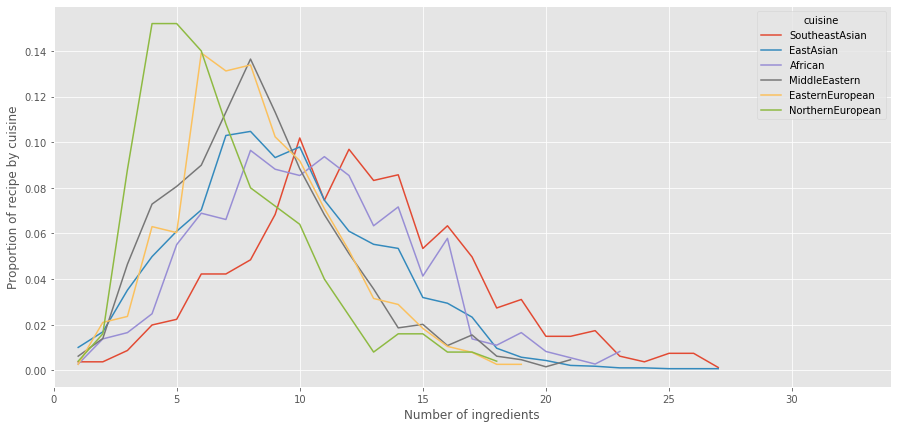

In [13]:
fig, ax = plt.subplots(figsize=(15,7))
nbingr_cuis.plot(y=cuisine_list[6:],ax=ax)
ax.set_xlabel("Number of ingredients")
ax.set_ylabel("Proportion of recipe by cuisine")

Results are worse when we remove American recipes!
Check what exactly are those results
See if we should remove american, if yes, how to improve score ???

### Counter for ingredients

In [14]:
counters = {}
for cuisine in df_train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df_train['cuisine'] == cuisine)
    for ingredients in df_train[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [15]:
counters['WesternEuropean'].most_common(10)

[('butter', 1620),
 ('egg', 1406),
 ('wheat', 1278),
 ('milk', 912),
 ('olive_oil', 727),
 ('onion', 724),
 ('cream', 659),
 ('black_pepper', 621),
 ('garlic', 546),
 ('salt', 511)]

In [16]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
top10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
SouthernEuropean,olive_oil,garlic,tomato,egg,onion,salt,butter,black_pepper,basil,parmesan_cheese
WesternEuropean,butter,egg,wheat,milk,olive_oil,onion,cream,black_pepper,garlic,salt
NorthAmerican,butter,egg,wheat,onion,milk,garlic,vegetable_oil,vanilla,cream,olive_oil
Asian,soy_sauce,vegetable_oil,sesame_oil,garlic,ginger,salt,rice,sugar,scallion,water
LatinAmerican,garlic,cayenne,onion,tomato,cumin,olive_oil,salt,vegetable_oil,cilantro,corn
SouthAsian,salt,turmeric,garam_masala,vegetable_oil,cumin,garlic,cumin_seed,coriander,cinnamon,cayenne
SoutheastAsian,garlic,vegetable_oil,fish,soy_sauce,cayenne,lime_juice,cilantro,rice,fish_sauce,ginger
EastAsian,soy_sauce,garlic,scallion,sesame_oil,cayenne,rice,ginger,vegetable_oil,black_pepper,soybean
African,olive_oil,onion,cumin,garlic,cayenne,cinnamon,wheat,coriander,bell_pepper,black_pepper
MiddleEastern,wheat,olive_oil,egg,onion,garlic,butter,lemon_juice,black_pepper,parsley,vegetable_oil


In [17]:
df_train['all_ingredients'].str.contains('garlic').value_counts()

False    55136
True     28893
Name: all_ingredients, dtype: int64

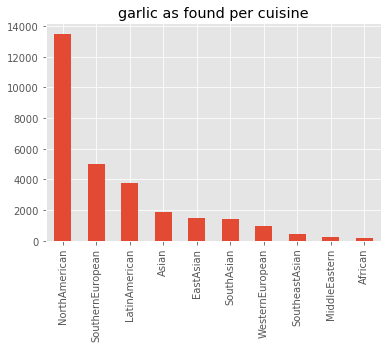

In [18]:
indices = df_train['all_ingredients'].str.contains('garlic')
df_train[indices]['cuisine'].value_counts().head(10).plot(kind='bar',
                                                 title='garlic as found per cuisine')

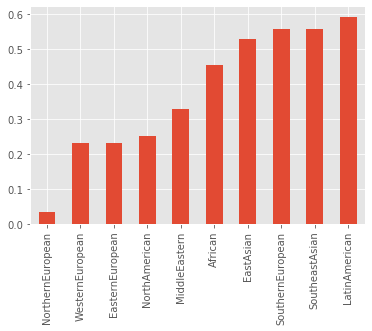

In [19]:
relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
relative_freq.sort_values(inplace=True)
relative_freq.head(10).plot(kind='bar')

In [20]:
unique = np.unique(top10.values.ravel())
unique.shape

(41,)

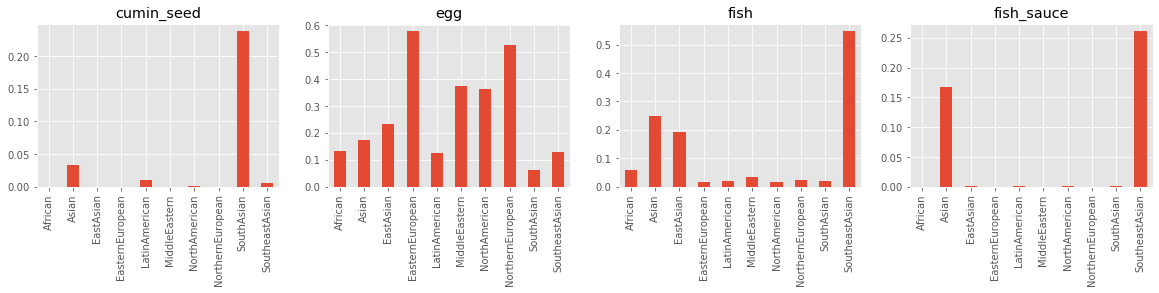

In [21]:
# spot ingredients which have a high degree of uniqueness
square_nb = 4

fig, axes = plt.subplots(1, square_nb, figsize=(20, 3))
for ingredient, ax_index in zip(unique[12:], range(square_nb)):
    indices = df_train['all_ingredients'].str.contains(ingredient)
    relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
    relative_freq.head(10).plot(kind='bar', ax=axes.ravel()[ax_index], title=ingredient)